# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Justin P. Kilchenmann

[https://github.com/jkilchenmann/web-scraping](https://github.com/jkilchenmann/web-scraping)



Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### Question 1

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [1]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
parser = 'html.parser'

article_page = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')
article_html = article_page.text

with open('python-match.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)

### Question 2

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [2]:
soup = BeautifulSoup(article_html, parser)
article_element = soup.find('article')
print(article_element.get_text())



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

### Question 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [3]:
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_element.get_text())

non_ws_tokens = []
for token in doc:
    if not token.is_space:
        non_ws_tokens.append(token)

def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)
        
interesting_tokens = [token.lower_ for token in doc if we_care_about(token)]
word_freq = Counter(map(str,interesting_tokens))
print('The five most common tokens from the article with the number of occurrences:', word_freq.most_common(5))

The five most common tokens from the article with the number of occurrences: [('laser', 35), ('headlights', 19), ('headlight', 11), ('technology', 10), ('led', 10)]


### Question 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [4]:
interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)
print('The five most common lemmas from the article with the number of occurrences:', lemma_freq.most_common(5))

The five most common lemmas from the article with the number of occurrences: [('laser', 40), ('headlight', 28), ('beam', 12), ('led', 11), ('technology', 10)]


### Question 5

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [5]:
token_words = set()
for token, freq in word_freq.most_common(5):
    token_words.add(token)
print(token_words)

lemma_words = set()
for lemma, freq in lemma_freq.most_common(5):
    lemma_words.add(lemma)
print(lemma_words)

sentences = list(doc.sents) 

def sentence_length (sent):
    for count in sentences:
        count = 0
    for token in sent:
        if not(token.is_space or token.is_punct):
            count += 1
    return count

def score_sentence_by_token(sentence, token_words):
    for sentence in sentences:
        count = 0
        for interesting_token in sentence:
            if token in token_words:
                count += 1
        return count/sentence_length(sentence)
                
def score_sentence_by_lemmas(sentence, lemma_words):
    for sentence in sentences:
        count = 0
        for interesting_lemmas in sentence:
            if token in lemma_words:
                count += 1
        return count/sentence_length(sentence)

total = sentence_length(sentences[0])
count = round(score_sentence_by_token(sentences[0], token_words))
count_lemmas = round(score_sentence_by_lemmas(sentences[0], lemma_words))
print('Output: score_sentence_by_token: ',count,'/',total, count/total)
print('Output: score_sentence_by_lemmas: ',count_lemmas,'/',total, count_lemmas/total)


{'technology', 'headlight', 'led', 'headlights', 'laser'}
{'technology', 'headlight', 'led', 'beam', 'laser'}
Output: score_sentence_by_token:  2 / 12 0.16666666666666666
Output: score_sentence_by_lemmas:  2 / 12 0.16666666666666666


### Question 6

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

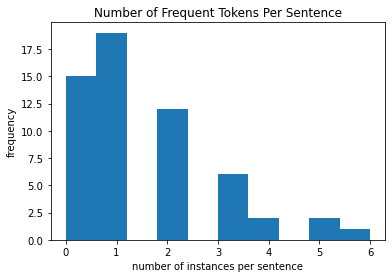

In [22]:
token_list=list()
sentences = list(doc.sents)
for sentence in sentences:
    count = 0
    for token in sentence:
        if token.lower_ in token_words:
            count += 1
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    token_list.append(count)

fig, ax = plt.subplots()
ax.set_ylabel('frequency')
ax.set_xlabel('number of instances per sentence')
ax.set_title('Number of Frequent Tokens Per Sentence')
plt.hist(token_list)
plt.show()

# The most common range is 0-1 frequent tokens per sentence.

### Question 7

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

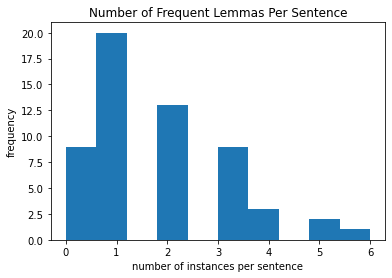

In [13]:
lemma_list=list()
sentences = list(doc.sents)
for sentence in sentences:
    count = 0
    for token in sentence:
        if token.lemma_.lower() in lemma_words:
            count += 1
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    lemma_list.append(count)

fig, ax = plt.subplots()
ax.set_ylabel('frequency')
ax.set_xlabel('number of instances per sentence')
ax.set_title('Number of Frequent Lemmas Per Sentence')
plt.hist(lemma_list)
plt.show()

# The most common range is 1-2 frequent lemmas per sentence.

### Question 8

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

I may be missing something here, but all of the tokens and lexems that I found in questions 3 and 4 are nouns.  LED, when considering what the acronym stands for, is a noun but the model would have to be able to discern when we were talking about light emitting diodes and the verb "led."  Changing the words into lower-case makes that harder to determine.  Leaving it as an upper-case acronym makes it clearer that we are talking about a noun and not a verb.  Otherwise, you would probably need to train the model to look at words that come before the verb in the sentence, as nounds are more likely to be before the verb.